In [47]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [35]:
csv_folder = "/work/test-first-project/data/worldometers-data/"
csv_files = [os.path.join(csv_folder, f) for f in os.listdir(csv_folder) if f.endswith(".csv")]
df_list = []
resampling_rule = None # "W-Mon"
# merge available csv
for file in csv_files:
    country = file.split("/")[-1].split(".")[0]
    df = pd.read_csv(file, parse_dates=True, index_col=0)
    new_column_name = {k: "{0:s}-{1:s}".format(country, k).replace(" ", "_") for k in df.columns}
    df.rename(columns=new_column_name, inplace=True)
    df_list.append(df)
overall_df = pd.concat(df_list, axis=1)
# check that no dates are lost
for df in df_list: 
    assert np.sum(~df.index.isin(overall_df.index))==0
# if we choose to resample 
if not isinstance(resampling_rule, type(None)):
    overall_df = overall_df.resample(resampling_rule).sum()

In [38]:
overall_df.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2021-06-23', '2021-06-24', '2021-06-25', '2021-06-26',
               '2021-06-27', '2021-06-28', '2021-06-29', '2021-06-30',
               '2021-07-01', '2021-07-02'],
              dtype='datetime64[ns]', name='Date', length=528, freq='D')

In [45]:
overall_df.resample('W-Mon').sum()

,poland-Currently_Infected,poland-Percent_(%),poland-Total_Coronavirus_Cases,poland-Novel_Coronavirus_Daily_Cases,poland-Total_Coronavirus_Currently_Infected,poland-Total_Coronavirus_Deaths,poland-Novel_Coronavirus_Daily_Deaths,poland-New_Daily_Coronavirus_Cases+Cured,poland-Percent_(%).1,australia-Currently_Infected,...,austria-Percent_(%).1,italy-Currently_Infected,italy-Percent_(%),italy-Total_Coronavirus_Cases,italy-Novel_Coronavirus_Daily_Cases,italy-Total_Coronavirus_Currently_Infected,italy-Total_Coronavirus_Deaths,italy-Novel_Coronavirus_Daily_Deaths,italy-New_Daily_Coronavirus_Cases+Cured,italy-Percent_(%).1
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-27,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2020-02-03,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2020-02-10,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2020-02-17,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,15.0,...,0.00,9.0,0.00,9.0,0.0,9.0,0.0,0.0,0.0,0.00
2020-02-24,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,56.0,...,0.00,476.0,237.78,496.0,226.0,476.0,13.0,7.0,2.0,237.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-07,1099153.0,19.09,20120171.0,3049.0,1099153.0,518467.0,415.0,6188.0,19.09,895.0,...,11.62,1133859.0,21.77,29589347.0,15875.0,1133859.0,884851.0,460.0,65306.0,21.77
2021-06-14,1083501.0,19.16,20138130.0,2275.0,1083501.0,521289.0,414.0,2982.0,19.16,1021.0,...,11.58,853791.0,21.56,29685825.0,12081.0,853791.0,888259.0,450.0,48400.0,21.56
2021-06-21,1076557.0,19.21,20148863.0,1238.0,1076557.0,523310.0,255.0,1789.0,19.21,1082.0,...,11.55,648840.0,21.43,29751330.0,7682.0,648840.0,890455.0,248.0,40287.0,21.43


<AxesSubplot:xlabel='Date'>

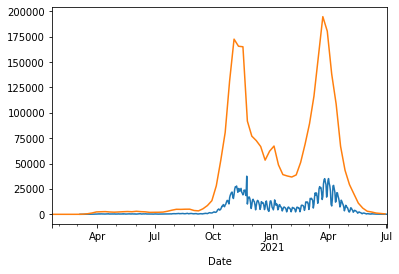

In [50]:
fig, ax = plt.subplots()
overall_df["poland-Novel_Coronavirus_Daily_Cases"].plot(ax=ax)
overall_df.resample('W-Mon').sum()["poland-Novel_Coronavirus_Daily_Cases"].plot(ax=ax)

In [59]:
overall_df.resample('W-Mon').sum()["poland-Novel_Coronavirus_Daily_Cases"][pd.to_datetime("2021-05-30"):pd.to_datetime("2021-06-07")]

Date
2021-05-31    6093.0
2021-06-07    3049.0
Freq: W-MON, Name: poland-Novel_Coronavirus_Daily_Cases, dtype: float64

In [57]:
overall_df["poland-Novel_Coronavirus_Daily_Cases"][pd.to_datetime("2021-06-01"):pd.to_datetime("2021-06-07")]

Date
2021-06-01    583.0
2021-06-02    657.0
2021-06-03    572.0
2021-06-04    317.0
2021-06-05    415.0
2021-06-06    310.0
2021-06-07    195.0
Freq: D, Name: poland-Novel_Coronavirus_Daily_Cases, dtype: float64

In [30]:
help(df_list[0].index.isin)

Help on method isin in module pandas.core.indexes.base:

isin(values, level=None) method of pandas.core.indexes.datetimes.DatetimeIndex instance
    Return a boolean array where the index values are in `values`.
    
    Compute boolean array of whether each index value is found in the
    passed set of values. The length of the returned boolean array matches
    the length of the index.
    
    Parameters
    ----------
    values : set or list-like
        Sought values.
    level : str or int, optional
        Name or position of the index level to use (if the index is a
        `MultiIndex`).
    
    Returns
    -------
    is_contained : ndarray
        NumPy array of boolean values.
    
    See Also
    --------
    Series.isin : Same for Series.
    DataFrame.isin : Same method for DataFrames.
    
    Notes
    -----
    In the case of `MultiIndex` you must either specify `values` as a
    list-like object containing tuples that are the same length as the
    number of level

In [5]:
import os
import pandas as pd
import subprocess
import covid_daily
from covid_daily.constants import AVAILABLE_CHARTS, AVAILABLE_COUNTRIES


def records_country(country_name, data_folder, add_dataset=False):
    """
    Get and records data from Worldometers.info
    Args: 
        country_name: (str) name of the country to records data,
        data_folder: (str) folder path to records data in,
        add_dataset: (bool) if True, trigger renku dataset add command
    """
    data = [covid_daily.data(country=country_name, chart=chart, as_json=False) for chart in AVAILABLE_CHARTS]
    data = pd.concat(data, axis=1)
    csv_path = os.path.join(data_folder,"{0:s}.csv".format(country_name))
    data.to_csv(csv_path)
    if add_dataset:
        cmd = "renku dataset add worldometers-data {0:s}".format(csv_path)
        subprocess.run(cmd, shell=True)
    return 

In [7]:
records_country("france", folder_name)

In [ ]:
folder_name = "/work/test-first-project/data/worldometers-data"
for country in AVAILABLE_COUNTRIES:
    records_country(country, folder_name)

In [23]:
os.mkdir("/work/test-first-project/data/worldometers-data")

In [ ]:
renku dataset add flight-data data/flight-data/2019-01-flights.csv.zip

In [20]:

data.head()

,Currently Infected,Percent (%),Total Coronavirus Cases,Novel Coronavirus Daily Cases,Total Coronavirus Currently Infected,Total Coronavirus Deaths,Novel Coronavirus Daily Deaths,New Daily Coronavirus Cases+Cured,Percent (%)
Date,,,,,,,,,
2020-02-15,7,20.00,12,NaN,7,1,NaN,NaN,20.00
2020-02-16,7,20.00,12,0.0,7,1,0.0,0.0,20.00
2020-02-17,6,16.67,12,0.0,6,1,0.0,1.0,16.67
2020-02-18,4,12.50,12,0.0,4,1,0.0,2.0,12.50
2020-02-19,4,12.50,12,0.0,4,1,0.0,0.0,12.50


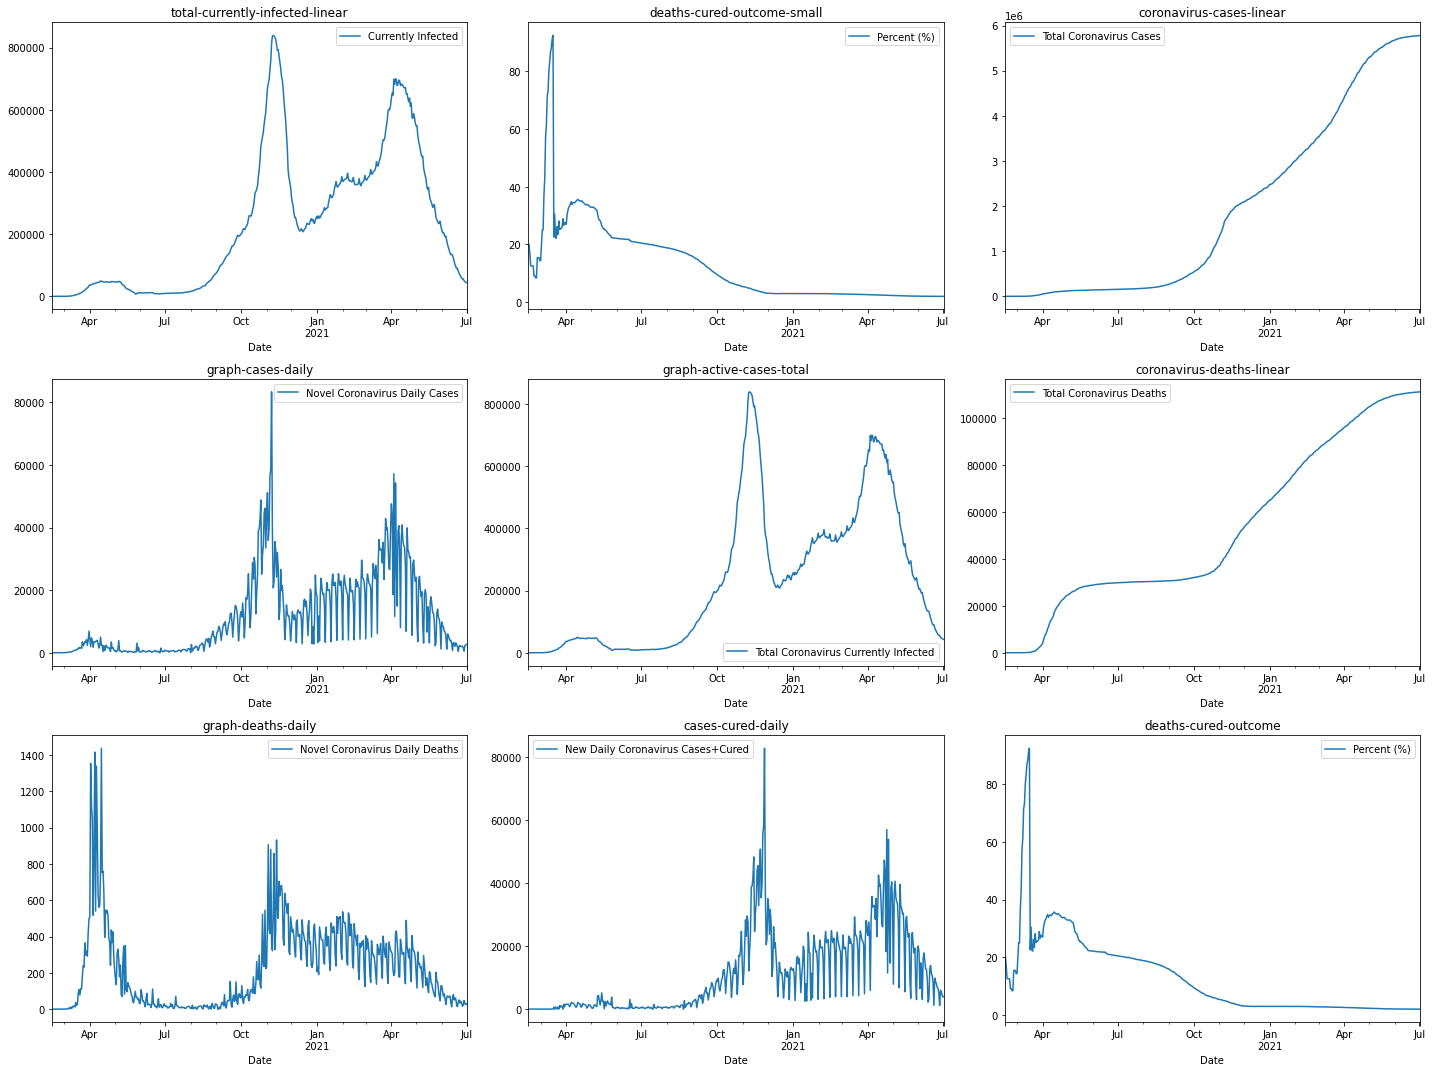

In [2]:
import covid_daily



fig, axs = plt.subplots(3, 3, figsize=(20,15))

from itertools import product

pairs = list(product((range(3)), (range(3))))

for idx, available_chart in enumerate(a):
    data = covid_daily.data(country='france', chart=available_chart, as_json=False)
    data.plot(ax=axs[pairs[idx]], title=available_chart)

fig.tight_layout()
fig.show()